In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [3]:
file_path = "park_reviews.csv"
df = pd.read_csv(file_path)
df.head()

,Park Name,Author,Rating,Text
0,Riley Park,Patrina M,4,"Love this park, we visited while in Calgary. A..."
1,Riley Park,Bharat Raj Verma,5,Great Park near downtown.\nHas 2 cricket pitch...
2,Riley Park,Colette Pelletier,4,"A beautiful walk in the summer, great bike pat..."
3,Riley Park,Bharat Shah,5,This is a beautiful park in the vicinity of do...
4,Riley Park,Vian Esterhuizen,5,It's a really nice park. I'm surprised it's no...


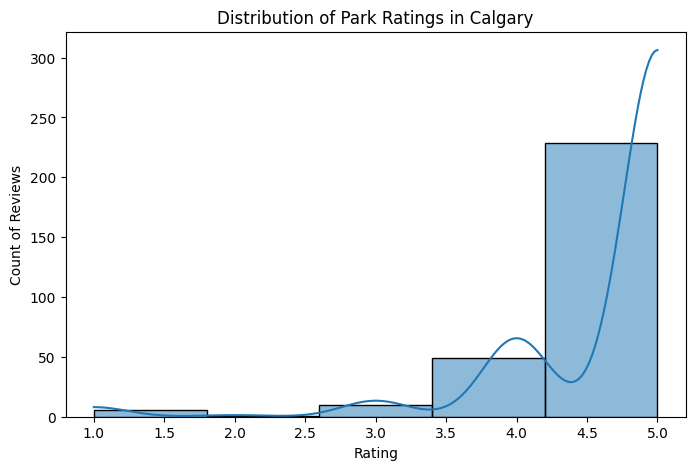

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"], bins=5, kde=True)
plt.xlabel("Rating")
plt.ylabel("Count of Reviews")
plt.title("Distribution of Park Ratings in Calgary")
plt.show()

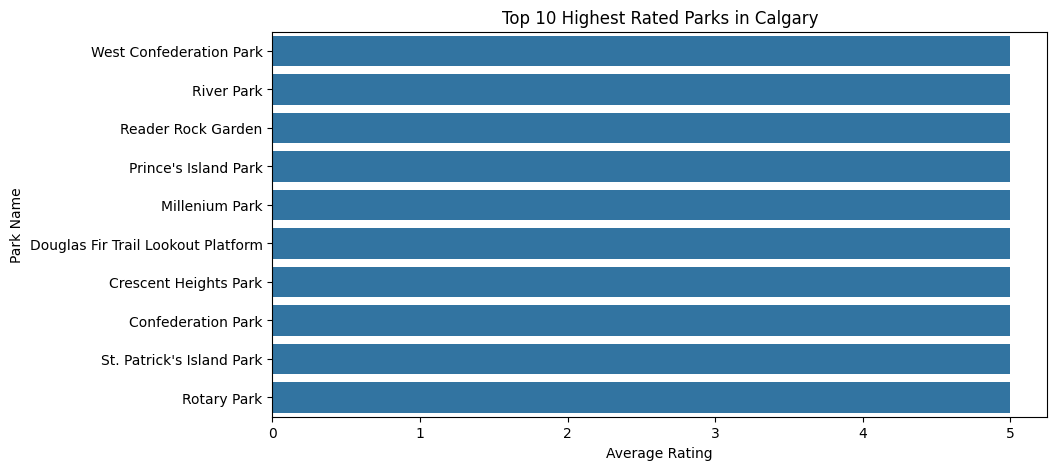

In [7]:
top_rated_parks = df.groupby("Park Name")["Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_parks.values, y=top_rated_parks.index)
plt.xlabel("Average Rating")
plt.ylabel("Park Name")
plt.title("Top 10 Highest Rated Parks in Calgary")
plt.show()

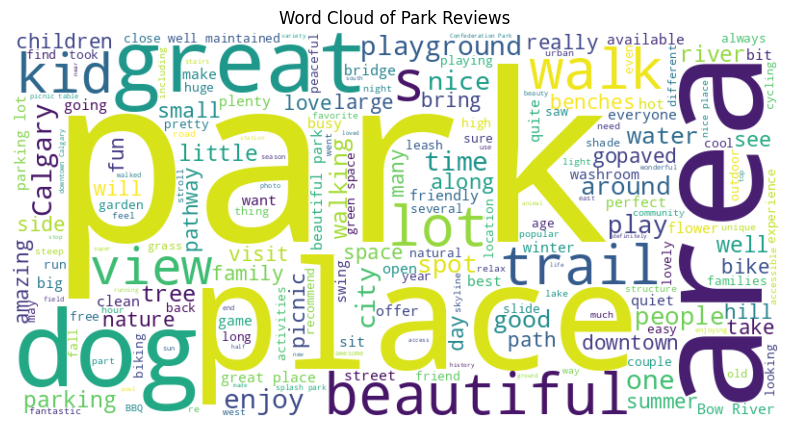

In [24]:
text_data = " ".join(df["Text"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Park Reviews")
plt.show()

In [25]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [26]:
df["Sentiment"] = df["Text"].apply(get_sentiment)
df["Sentiment Category"] = df["Sentiment"].apply(lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral"))
sentiment_categories = ["Positive", "Neutral", "Negative"]

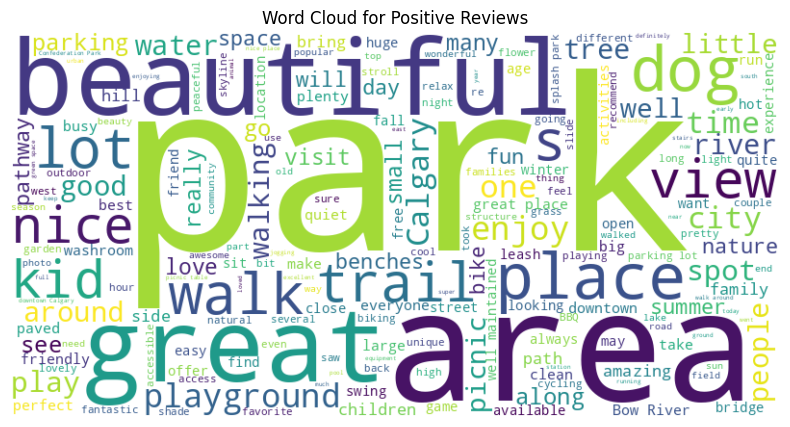

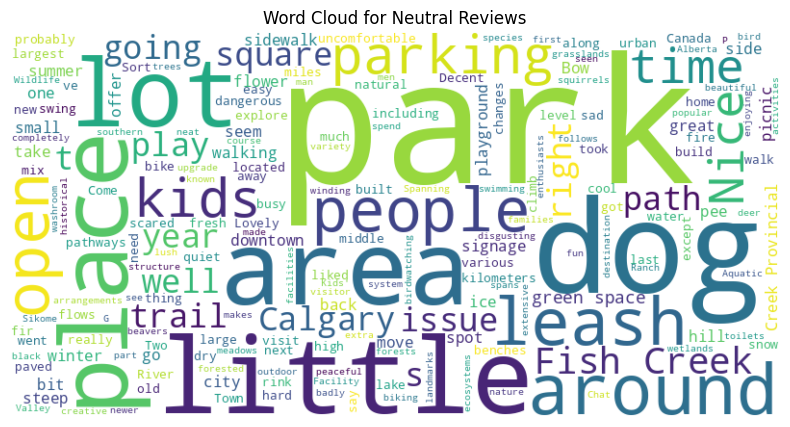

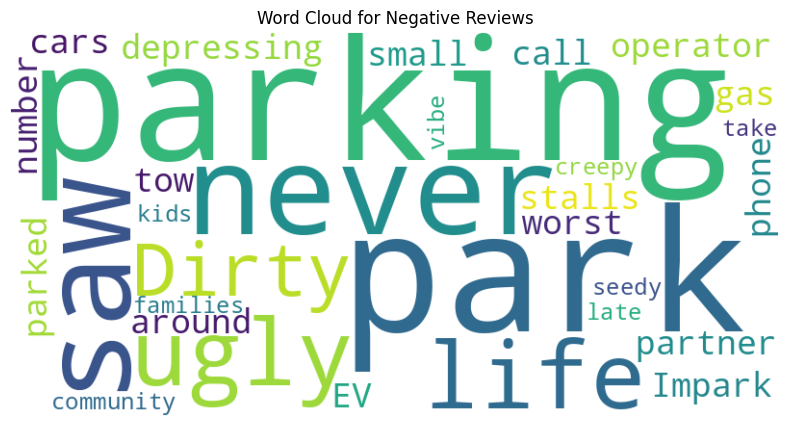

In [27]:
for sentiment in sentiment_categories:
    text_data = " ".join(df[df["Sentiment Category"] == sentiment]["Text"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()

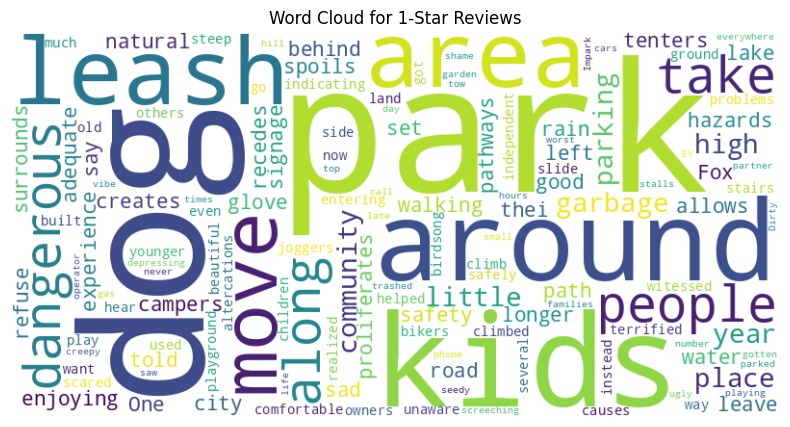

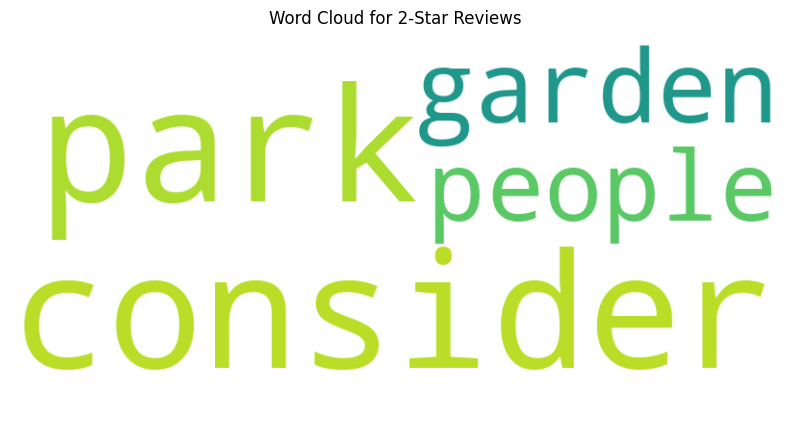

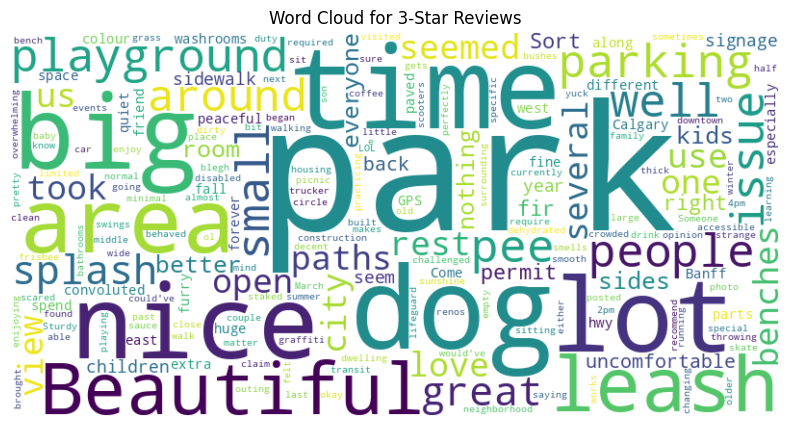

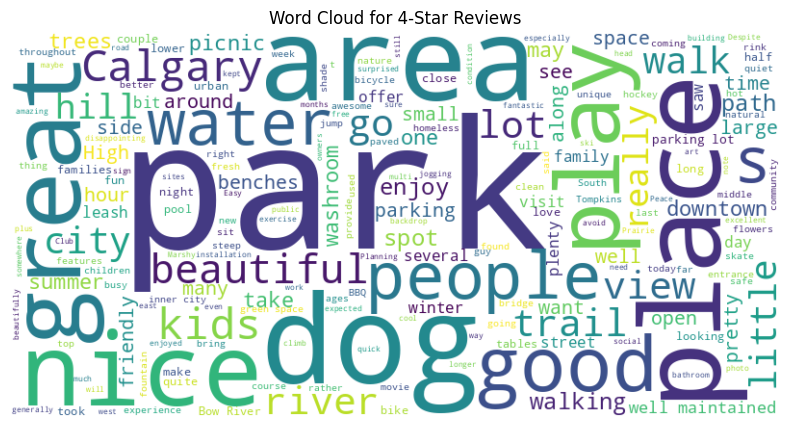

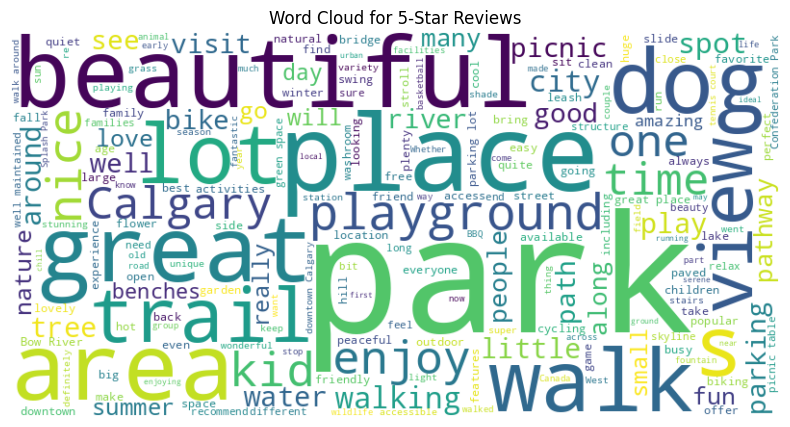

In [11]:
ratings = sorted(df["Rating"].unique())

for rating in ratings:
    text_data = " ".join(df[df["Rating"] == rating]["Text"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {rating}-Star Reviews")
    plt.show()


<ipython-input-29-32aa7d0825a5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings_per_park.values, y=avg_ratings_per_park.index, palette="viridis")


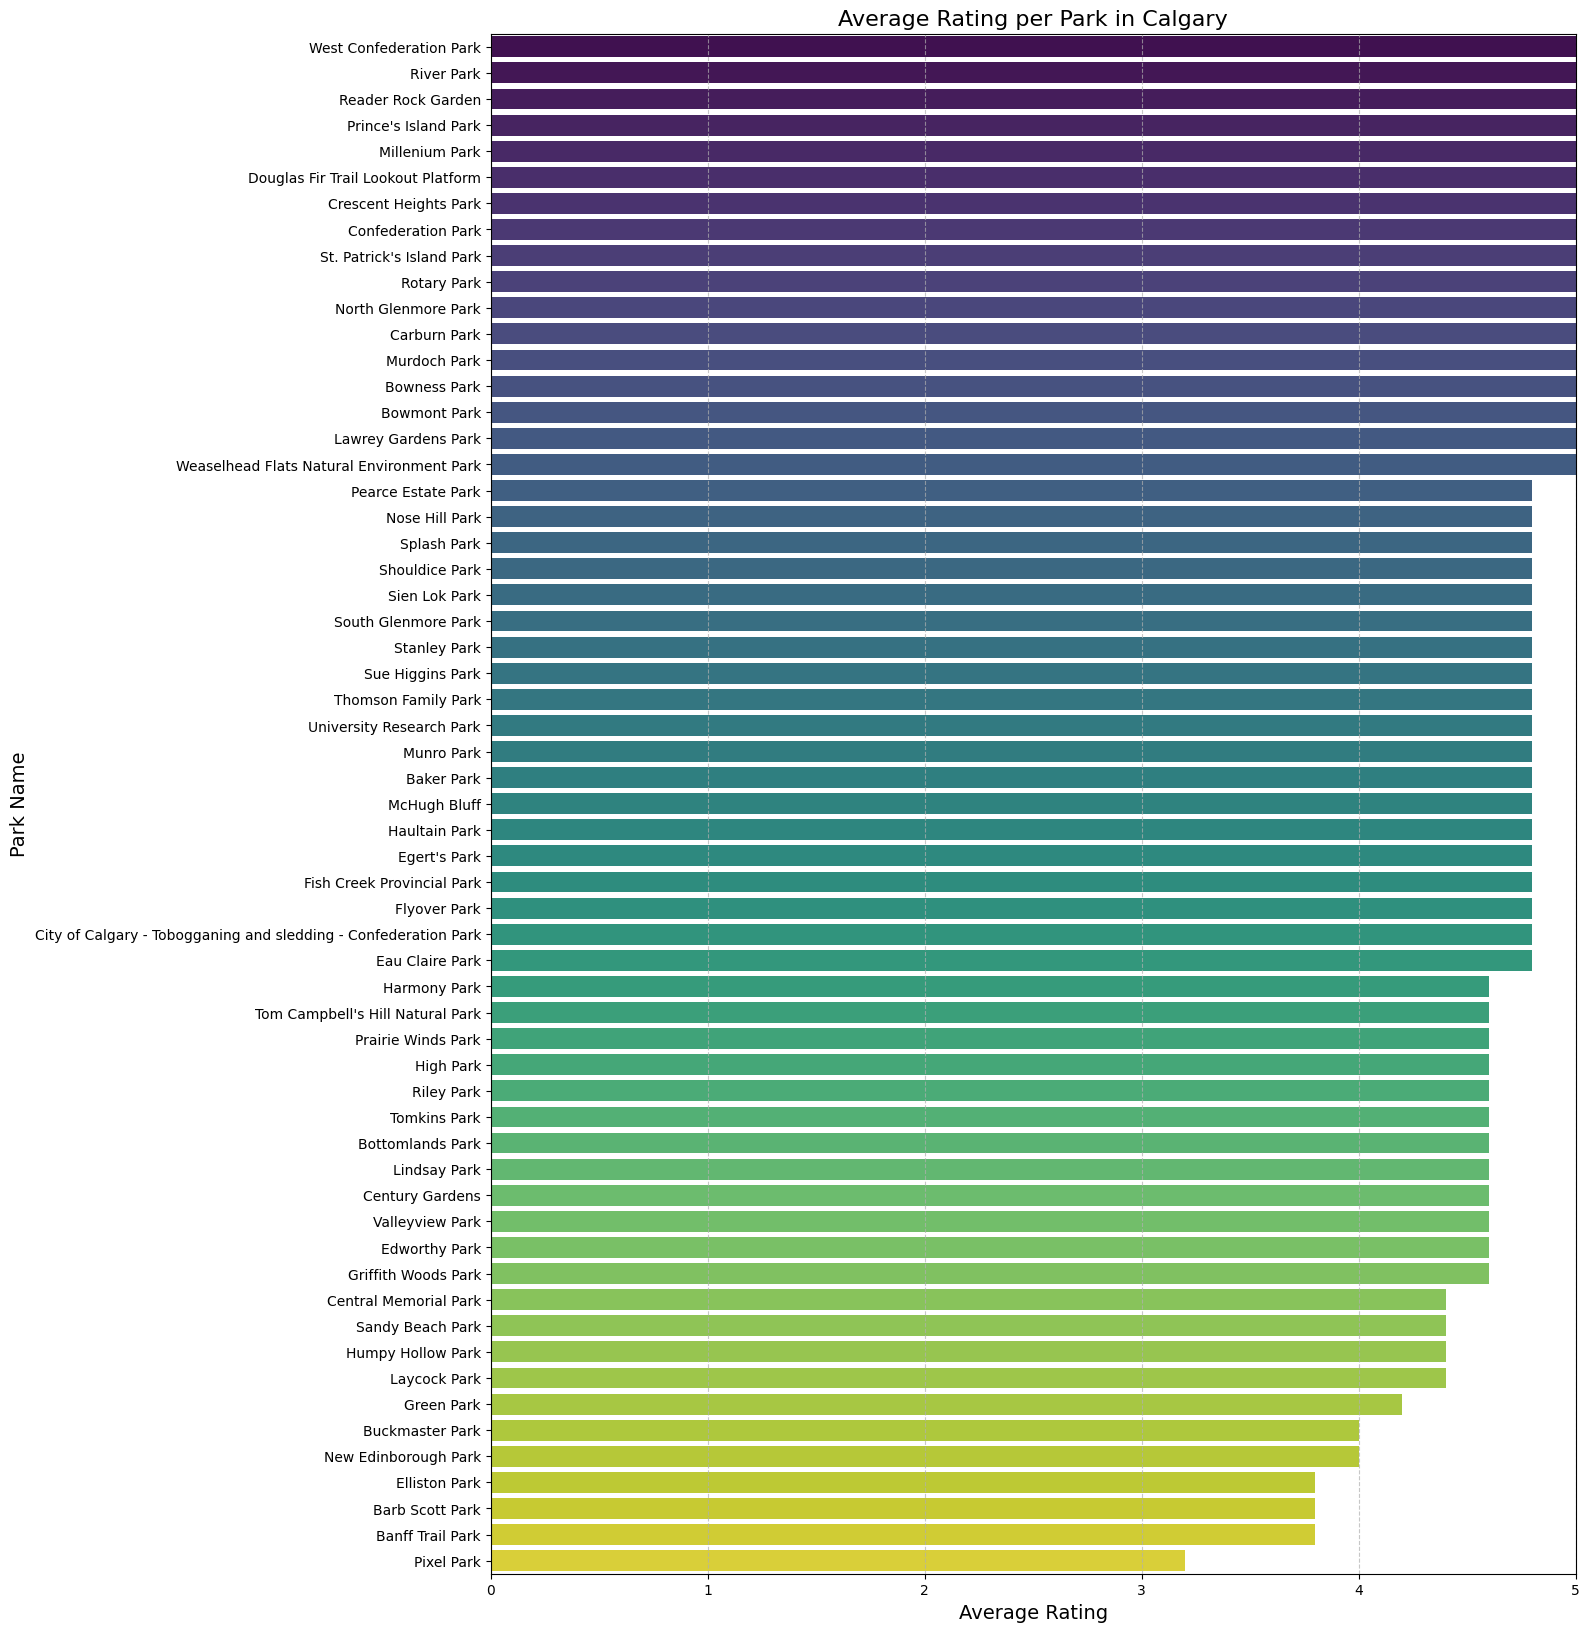

In [29]:
avg_ratings_per_park = df.groupby("Park Name")["Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 20))
sns.barplot(x=avg_ratings_per_park.values, y=avg_ratings_per_park.index, palette="viridis")

plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Park Name", fontsize=14)
plt.title("Average Rating per Park in Calgary", fontsize=16)

plt.yticks(fontsize=10)

plt.xlim(0, 5)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


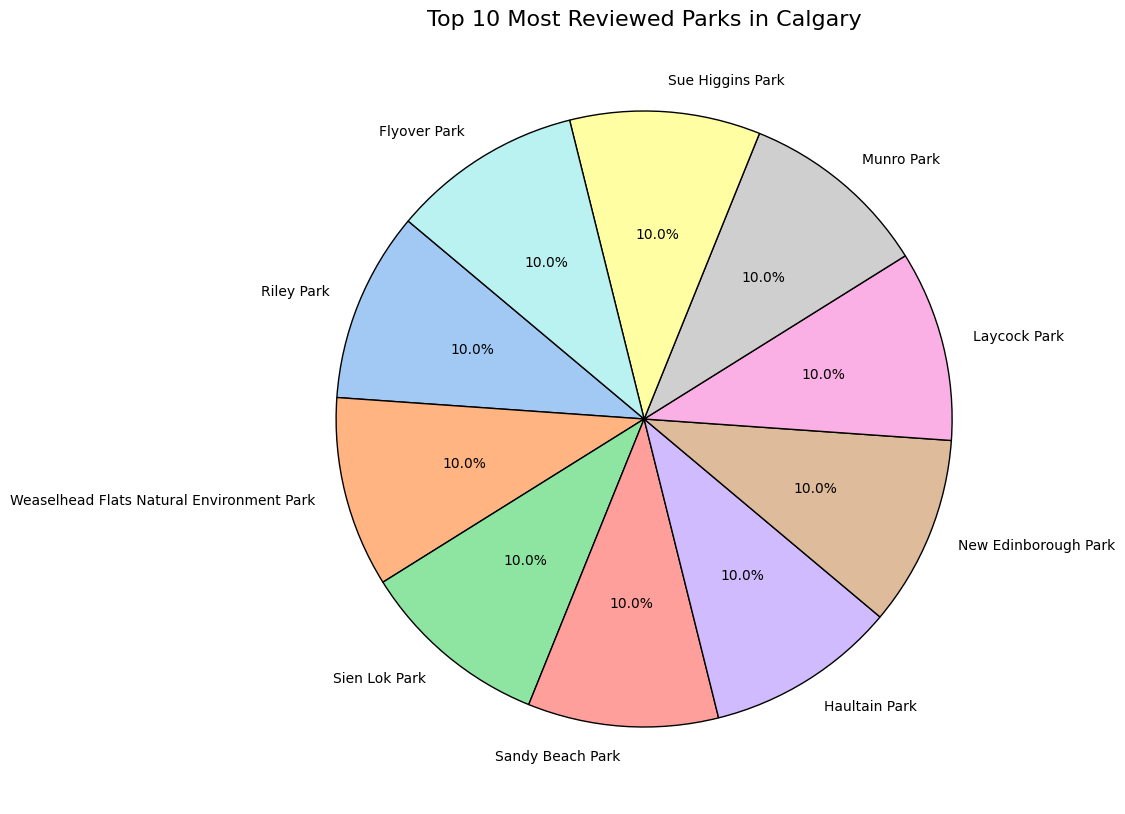

In [30]:
most_reviewed_parks = df["Park Name"].value_counts().head(10)  # Top 10 for readability

plt.figure(figsize=(10, 10))
colors = sns.color_palette("pastel")

plt.pie(most_reviewed_parks, labels=most_reviewed_parks.index, autopct="%1.1f%%",
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Most Reviewed Parks in Calgary", fontsize=16)
plt.show()
